In [133]:
import pandas as pd #For DataFrames
import numpy as np #Mathmatical Operations
import seaborn as sns #Plotting
import matplotlib.pyplot as plt #Plotting


In [134]:
df=pd.read_csv('train.csv')

# Data Cleaning

In [135]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [137]:
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [138]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [139]:
df.drop(['Cabin'],axis=1,inplace=True)

In [140]:
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [141]:
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [142]:
df.drop_duplicates(inplace=True)

In [143]:
#df['Pclass']=df['Pclass'].astype(object)

In [144]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 83.5+ KB


# EDA

<Axes: title={'center': 'Distribution of Pclass rgarding to survived or not'}, xlabel='Pclass', ylabel='count'>

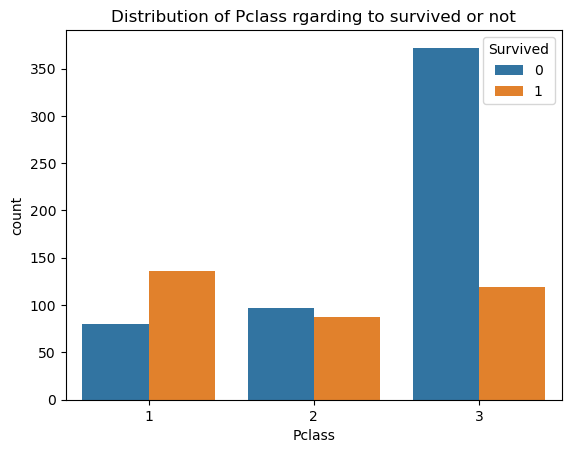

In [157]:
plt.title("Distribution of Pclass rgarding to survived or not")
sns.countplot(x='Pclass',hue='Survived',data=df)

<Axes: title={'center': 'Distribution of Gender rgarding to survived or not'}, xlabel='Sex', ylabel='count'>

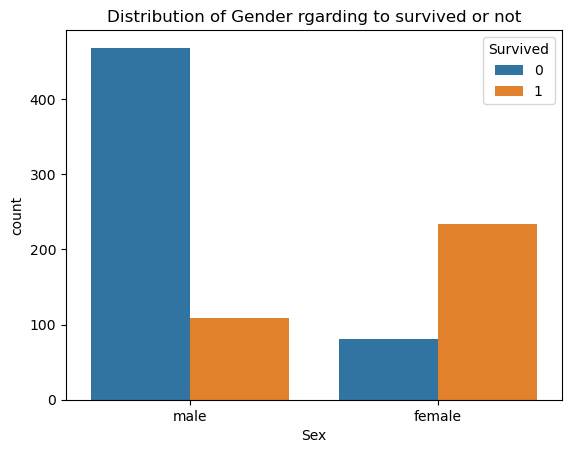

In [158]:
plt.title("Distribution of Gender rgarding to survived or not")
sns.countplot(x='Sex',hue='Survived',data=df)

<Axes: xlabel='Survived', ylabel='Age'>

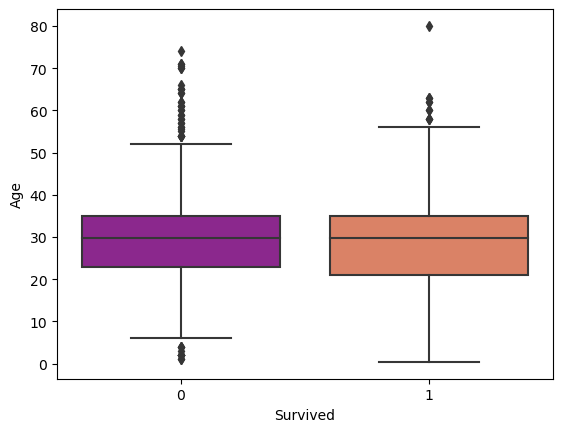

In [165]:
sns.boxplot(y='Age',x='Survived',data=df,palette='plasma')

([<matplotlib.patches.Wedge at 0x2b590e27810>,
 [Text(-1.027562611392443, -0.392574935099458, '0'),
  Text(1.0275625746369201, 0.39257503130681154, '1')],
 [Text(-0.5604886971231506, -0.21413178278152253, '61.6%'),
  Text(0.5604886770746836, 0.21413183525826082, '38.4%')])

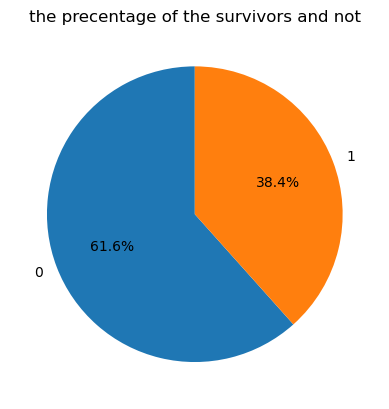

In [183]:
plt.title("the precentage of the survivors and not")
t=df['Survived'].value_counts()
plt.pie(t,startangle=90,labels=t.index, autopct='%1.1f%%')

<Axes: title={'center': 'Distribution of Embarked rgarding to survived or not'}, xlabel='Embarked', ylabel='count'>

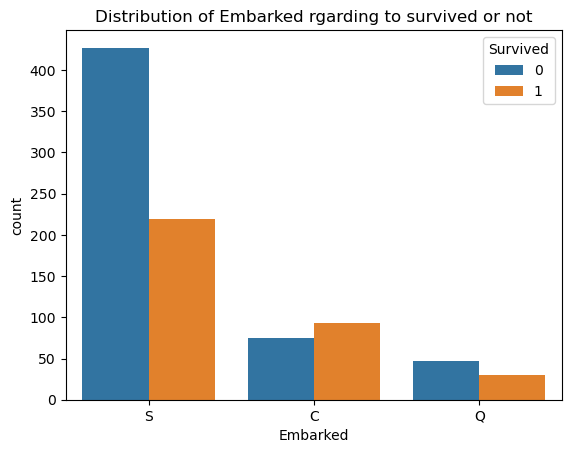

In [168]:
plt.title("Distribution of Embarked rgarding to survived or not")
sns.countplot(x='Embarked',hue='Survived',data=df)

Text(0.5, 1.0, 'Fare Distribution')

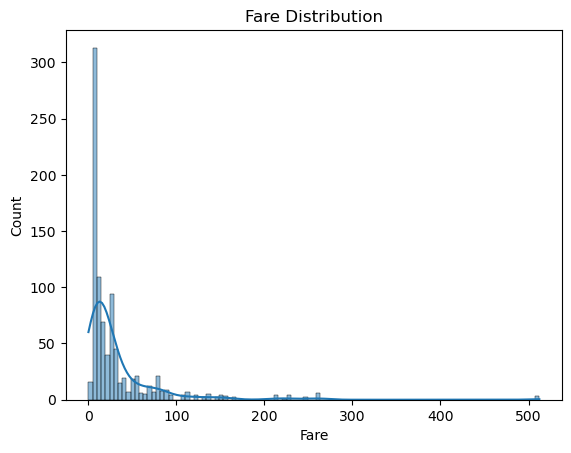

In [184]:
sns.histplot(x='Fare', data=df, kde=True)
plt.title('Fare Distribution')

In [190]:
df2=pd.get_dummies(df,columns=['Sex','Embarked'])

C:\Users\lklkl\AppData\Local\Temp\ipykernel_23224\3958484750.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df2.corr(),annot=True)


<Axes: >

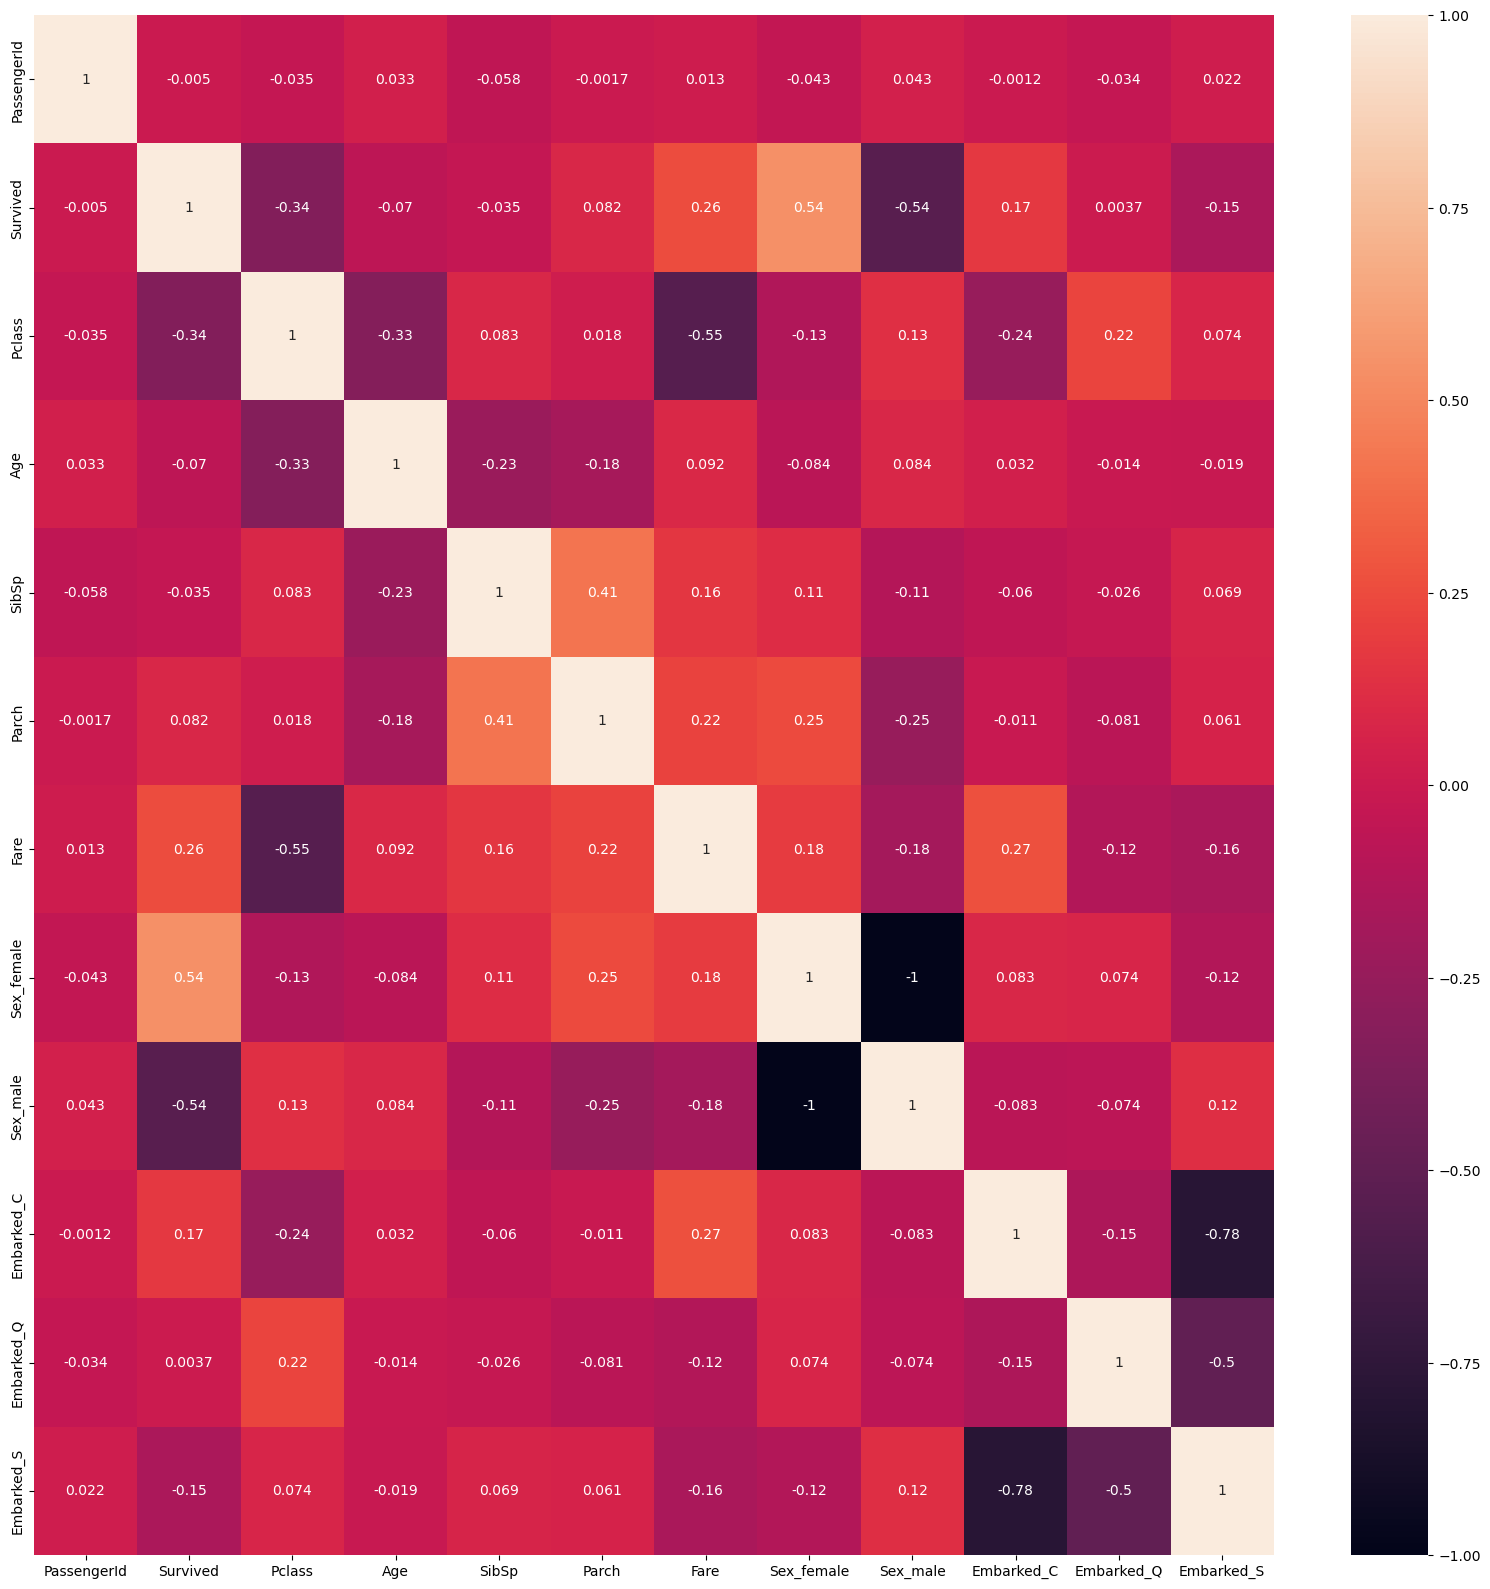

In [191]:
plt.figure(figsize=(20,20))
sns.heatmap(df2.corr(),annot=True)